# Simple Linear Regression
# 1) Delivery_time -> Predict delivery time using sorting time 



In [7]:
#Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [8]:
#Import data
delivery_time=pd.read_csv("delivery_time.csv")
delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
# Understanding data
delivery_time.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [10]:
delivery_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [11]:
delivery_time.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [12]:
len(delivery_time)

21

In [13]:
delivery_time.ndim

2

In [14]:
delivery_time.shape

(21, 2)

In [15]:
delivery_time.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [16]:
delivery_time.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [17]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [18]:
delivery_time.columns=("Delivery_time","Sorting_time")
delivery_time.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:xlabel='Delivery_time', ylabel='Density'>

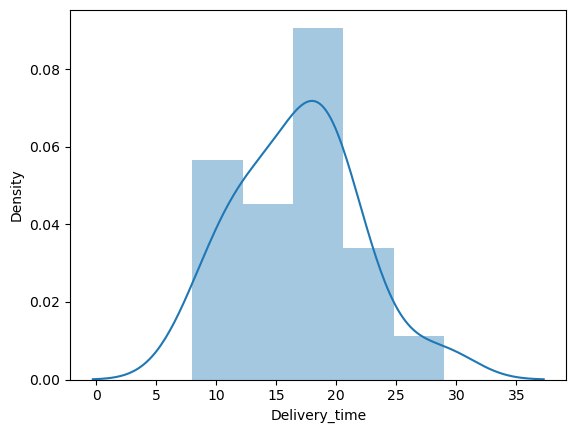

In [19]:
# Check Assumptions
import seaborn as sns
sns.distplot(delivery_time['Delivery_time'])

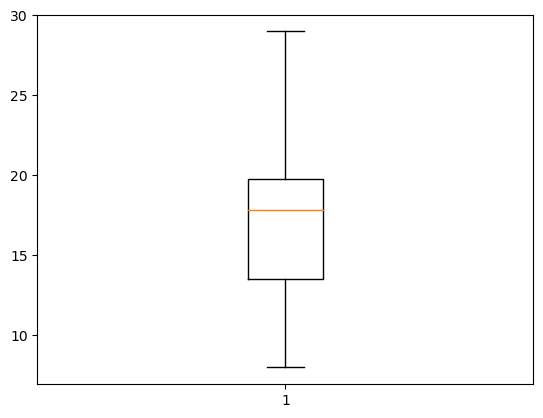

In [20]:
plt.boxplot(delivery_time.Delivery_time) 
plt.show() 

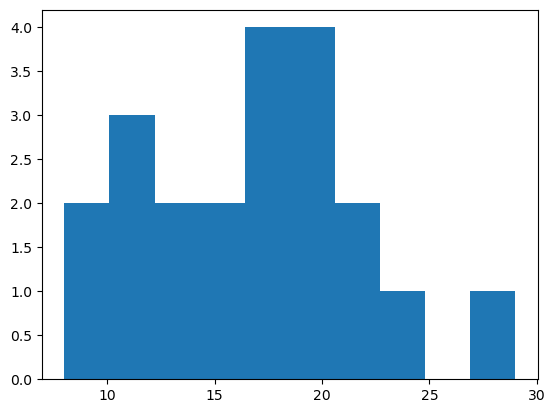

In [21]:
plt.hist(delivery_time.Delivery_time) 
plt.show() 

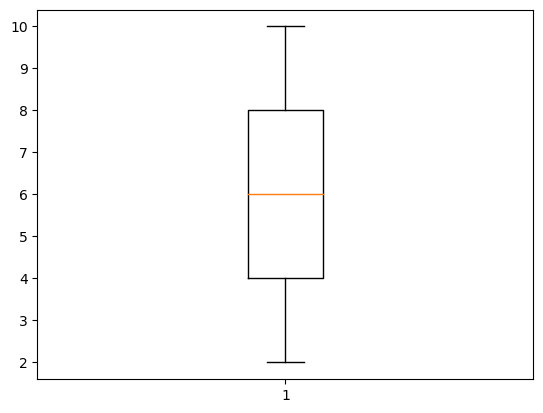

In [22]:
plt.boxplot(delivery_time.Sorting_time) 
plt.show() 

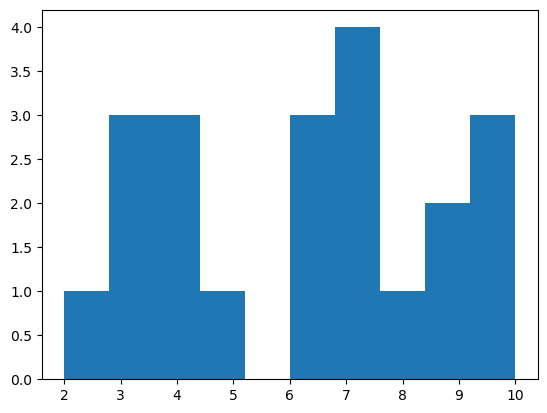

In [23]:
plt.hist(delivery_time.Sorting_time) 
plt.show() 

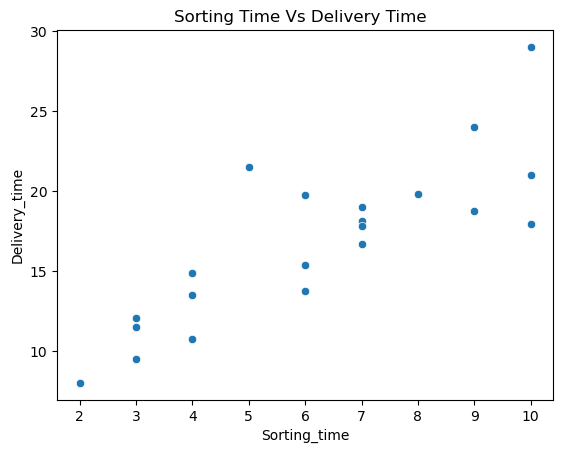

In [24]:
# Linearity 
sns.scatterplot(x = 'Sorting_time', y = 'Delivery_time', data = delivery_time)
plt.title( 'Sorting Time Vs Delivery Time  ')
plt.show()

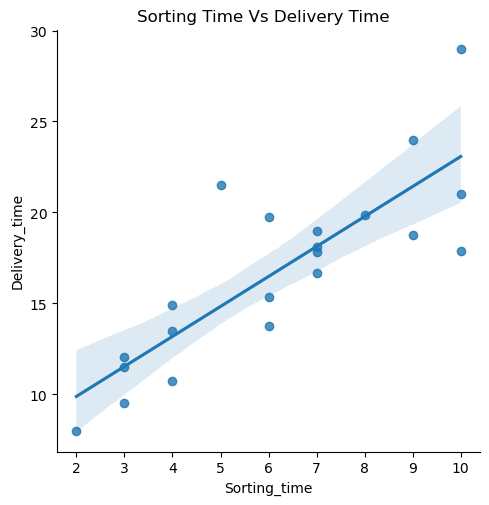

In [25]:
sns.lmplot(x = 'Sorting_time', y = 'Delivery_time', data = delivery_time)
plt.title( 'Sorting Time Vs Delivery Time  ')
plt.show()

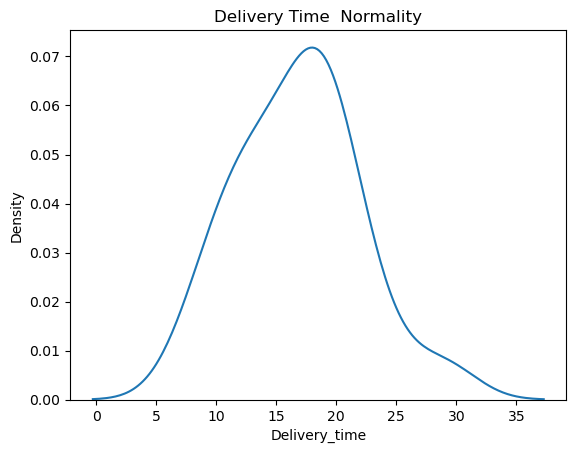

In [26]:
#Normality Test
sns.distplot(a = delivery_time['Delivery_time'],hist=False)
plt.title('Delivery Time  Normality')
plt.show()

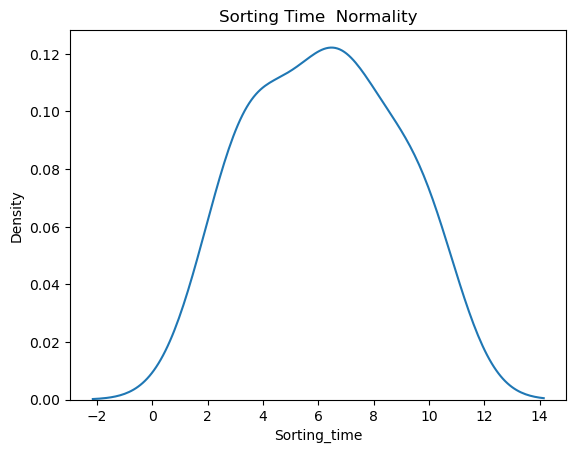

In [27]:
sns.distplot(a = delivery_time['Sorting_time'],hist=False)
plt.title('Sorting Time  Normality')
plt.show()

In [28]:
skew_delivery_time=delivery_time['Delivery_time'].skew()
print('Skewness of delivery time ',skew_delivery_time)

Skewness of delivery time  0.3523900822831107


In [29]:
skew_sorting_time=delivery_time['Sorting_time'].skew()
print('Skewness of sorting time ',skew_sorting_time)

Skewness of sorting time  0.047115474210530174


In [30]:
delivery_time.corr() 

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


# Fitting a Linear Regression Model

In [31]:
import statsmodels.formula.api as smf
model1_1=smf.ols("Delivery_time~Sorting_time",data=delivery_time).fit()
model1_1

In [40]:
model1_1.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           3.98e-06
Time:                        23:51:48   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
model1_1.resid 

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [42]:
pred_lin_1 = model1_1.predict(delivery_time.Sorting_time)
pred_lin_1  

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [64]:
 model1_1.resid_pearson 

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [65]:
rmse_lin_1= np.sqrt(np.mean((np.array(delivery_time['Delivery_time'])-np.array(pred_lin_1))**2))
rmse_lin_1

2.7916503270617654

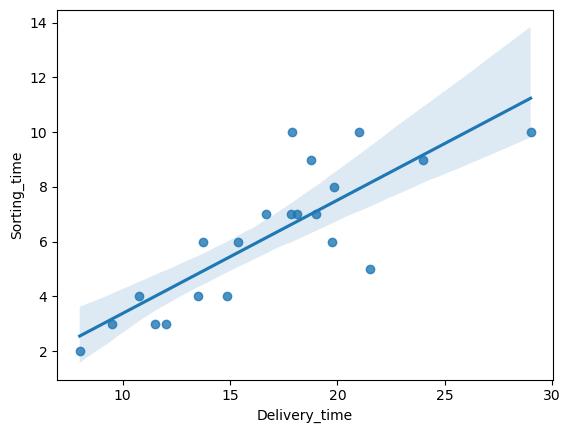

In [66]:
sns.regplot(x="Delivery_time", y="Sorting_time", data=delivery_time);

In [67]:
#Coefficients
model1_1.params 

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [68]:
#t and p-Values
print(model1_1.tvalues, '\n', model1_1.pvalues)  

Intercept       3.823349
Sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_time    0.000004
dtype: float64


In [69]:
#R squared values
(model1_1.rsquared,model1_1.rsquared_adj) 

(0.6822714748417231, 0.6655489208860244)

In [70]:
print(f"t value is\n{model1_1.tvalues}\nP value is\n{model1_1.pvalues}\n")
print(f"rsquared= {model1_1.rsquared},\nAdj.rsquared= {model1_1.rsquared_adj}")

t value is
Intercept       3.823349
Sorting_time    6.387447
dtype: float64
P value is
Intercept       0.001147
Sorting_time    0.000004
dtype: float64

rsquared= 0.6822714748417231,
Adj.rsquared= 0.6655489208860244


In [71]:
#model2_2
model2_1 = smf.ols('Sorting_time~np.log(Delivery_time)',data=delivery_time).fit()

In [72]:
model2_1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting_time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.59e-06
Time:                        00:00:39   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(Delivery_time)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
pred2_1 = model2_1.predict(pd.DataFrame(delivery_time['Delivery_time'])) 
pred2_1

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

In [74]:
rmse_log_1= np.sqrt(np.mean((np.array(delivery_time['Sorting_time'])-np.array(pred2_1))**2))
rmse_log_1   

1.3337477286899517

In [75]:
pred2_1.corr(delivery_time.Sorting_time)

0.843177263722415

In [76]:
#exponential model
#model3
model3_1 = smf.ols('np.log(Sorting_time)~Delivery_time',data=delivery_time).fit()
model3_1.params
model3_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Sun, 10 Sep 2023   Prob (F-statistic):           2.64e-06
Time:                          00:00:42   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
Delivery_time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
pred_log_1 = model3_1.predict(pd.DataFrame(delivery_time['Delivery_time']))

In [81]:
pred_log_1

0     2.052148
1     1.475394
2     1.956022
3     2.282850
4     2.667352
5     1.617660
6     1.898347
7     1.167792
8     1.813756
9     1.879122
10    1.962174
11    1.263917
12    1.719938
13    1.321593
14    1.362350
15    1.581517
16    1.494619
17    1.829905
18    1.052441
19    1.808373
20    2.090598
dtype: float64

In [82]:
pred3_1=np.exp(pred_log_1)  
pred3_1

0      7.784605
1      4.372758
2      7.071145
3      9.804581
4     14.401789
5      5.041280
6      6.674852
7      3.214886
8      6.133444
9      6.547752
10     7.114781
11     3.539259
12     5.584181
13     3.749389
14     3.905361
15     4.862325
16     4.457638
17     6.233298
18     2.864635
19     6.100516
20     8.089754
dtype: float64

In [83]:
rmse_exp_1 = np.sqrt(np.mean((np.array(delivery_time['Delivery_time'])-np.array(pred3_1))**2)) 
rmse_exp_1 

11.025443419556954

In [84]:
pred3_1.corr(delivery_time.Delivery_time)

0.9637367208375697

Text(0, 0.5, 'Sorting_time')

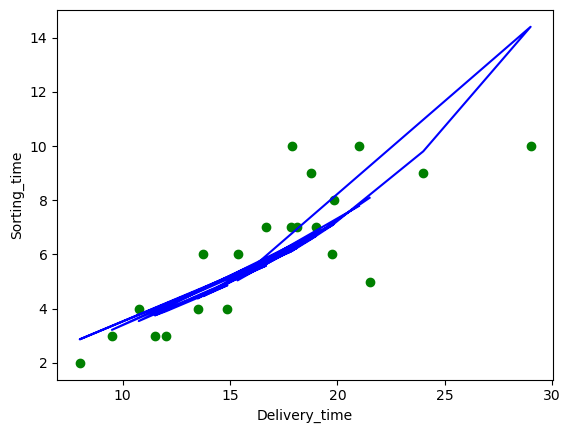

In [85]:
plt.scatter(x=delivery_time['Delivery_time'],y=delivery_time['Sorting_time'],color='green')
plt.plot(delivery_time.Delivery_time,pred3_1,color='blue')
plt.xlabel('Delivery_time')
plt.ylabel('Sorting_time')

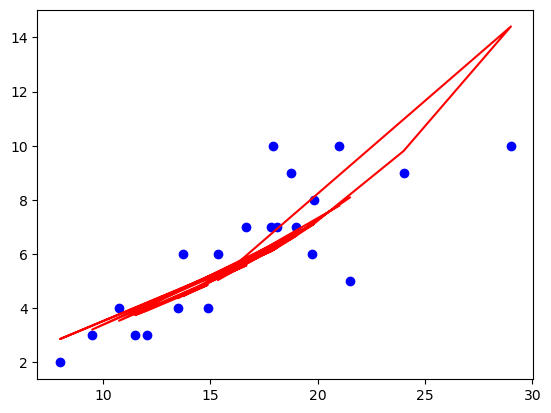

In [86]:
plt.plot(delivery_time['Delivery_time'],delivery_time['Sorting_time'], 'bo')  
plt.plot(delivery_time.Delivery_time,pred3_1,color='red')

In [87]:
Final_resid = model3_1.resid_pearson 
Final_resid

array([ 0.94514898, -0.33626175, -0.61992804, -0.32314918, -1.3766316 ,
        0.65705128,  0.17950335, -0.26108323,  1.84483896,  1.20051932,
        0.44256592,  0.46185032,  0.85281972, -0.84152838, -0.99534634,
       -0.7367689 ,  1.12140739,  0.43780144, -1.35597416,  0.51906376,
       -1.81589886])

Text(0, 0.5, 'Standardized Residual')

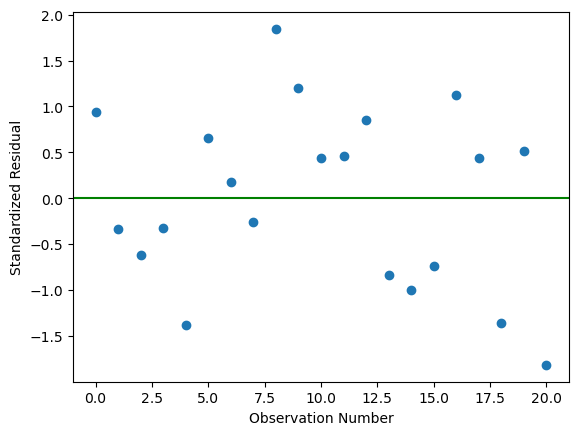

In [88]:
plt.plot(model3_1.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual") 

Text(0, 0.5, 'Actual')

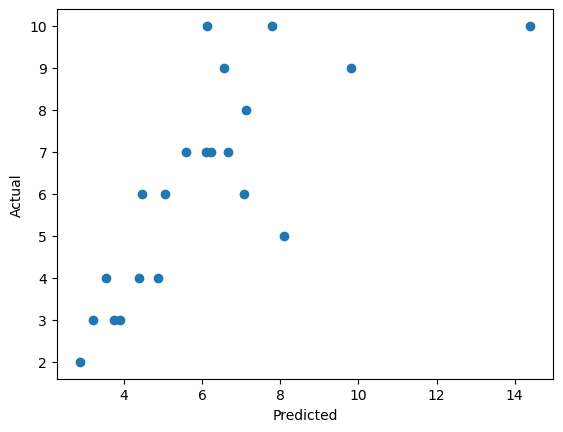

In [89]:
plt.scatter(x=pred3_1,y=delivery_time.Sorting_time)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [90]:
delivery_time["Deliverytime_Sq"] = delivery_time.Delivery_time*delivery_time.Delivery_time
delivery_time

,Delivery_time,Sorting_time,Deliverytime_Sq
0,21.00,10,441.0000
1,13.50,4,182.2500
2,19.75,6,390.0625
3,24.00,9,576.0000
4,29.00,10,841.0000
5,15.35,6,235.6225
6,19.00,7,361.0000
7,9.50,3,90.2500
8,17.90,10,320.4100
9,18.75,9,351.5625


In [91]:
#quad_model
model4_1 = smf.ols("np.log(Sorting_time)~Delivery_time+Deliverytime_Sq",data=delivery_time).fit()

In [92]:
model4_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_time)   R-squared:                       0.794
Model:                              OLS   Adj. R-squared:                  0.771
Method:                   Least Squares   F-statistic:                     34.62
Date:                  Sun, 10 Sep 2023   Prob (F-statistic):           6.77e-07
Time:                          00:02:05   Log-Likelihood:                 3.2337
No. Observations:                    21   AIC:                           -0.4673
Df Residuals:                        18   BIC:                             2.666
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.7780      0.450     -1.730      0.101      -1.723       0.167
Delivery_time       0.2272      0.052      4.346      0.000       0.117       0.337
Deliverytime_Sq    -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
pred_quad = model4_1.predict(delivery_time)
pred4_1=np.exp(pred_quad)  
pred4_1

0     8.250905
1     4.531944
2     7.720077
3     9.165723
4     9.206382
5     5.493602
6     7.370749
7     2.705128
8     6.827202
9     7.250110
10    7.756102
11    3.225473
12    6.195767
13    3.561679
14    3.809137
15    5.245998
16    4.659292
17    6.933311
18    2.152041
19    6.791625
20    8.441717
dtype: float64

In [95]:
rmse_quad_1 = np.sqrt(np.mean((np.array(delivery_time['Sorting_time'])-np.array(pred4_1))**2))
rmse_quad_1 

1.3471419800255697

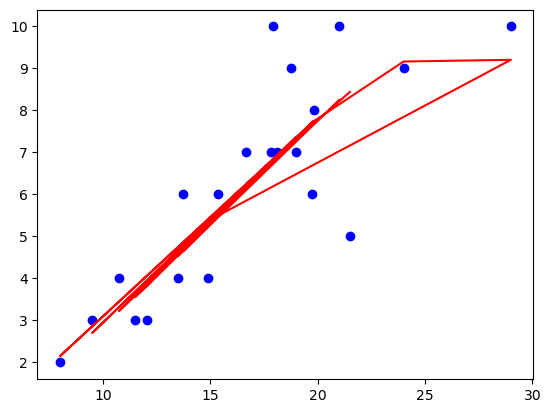

In [96]:
plt.scatter(delivery_time.Delivery_time,delivery_time.Sorting_time,c="b")
plt.plot(delivery_time.Delivery_time,pred4_1,"r") 

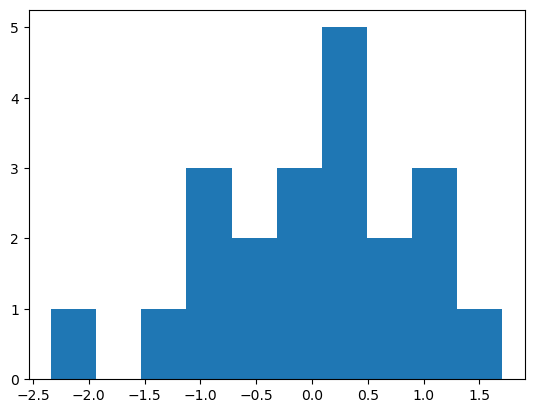

In [97]:
plt.hist(model4_1.resid_pearson)
plt.show() 

In [99]:
data = {"MODEL":pd.Series(["rmse_lin_1","rmse_log_1","rmse_exp_1","rmse_quad_1"]),
        "RMSE_Values":pd.Series([rmse_lin_1,rmse_log_1,rmse_exp_1,rmse_quad_1]),
        "Rsquare":pd.Series([model1_1.rsquared,model2_1.rsquared,model3_1.rsquared,model4_1.rsquared])}
table=pd.DataFrame(data)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin_1,2.791650,0.682271
1,rmse_log_1,1.333748,0.710948
2,rmse_exp_1,11.025443,0.695443
3,rmse_quad_1,1.347142,0.793693


# Prediction for new data point

In [100]:
data=pd.Series([5,10])
data

0     5
1    10
dtype: int64

In [101]:
data_pred=pd.DataFrame(data,columns=['Sorting_time'])
data_pred

,Sorting_time
0,5
1,10


In [102]:
model1_1.predict(data_pred)

0    14.827833
1    23.072933
dtype: float64

# 2) Salary_hike -> Build a prediction model for Salary_hike

In [103]:
#Import data
Salary_Data=pd.read_csv("Salary_Data.csv")
Salary_Data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [104]:
# Understanding data
Salary_Data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [105]:
Salary_Data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [106]:
Salary_Data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [107]:
len(Salary_Data)

30

In [108]:
Salary_Data.ndim

2

In [109]:
Salary_Data.shape

(30, 2)

In [110]:
Salary_Data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [111]:
Salary_Data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [112]:
Salary_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

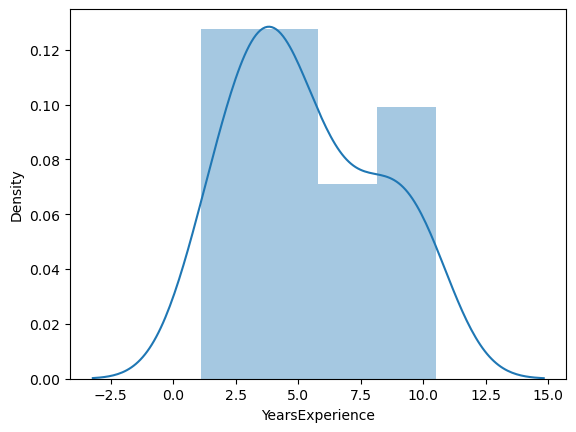

In [113]:
# Check Assumptions
import seaborn as sns
sns.distplot(Salary_Data['YearsExperience'])

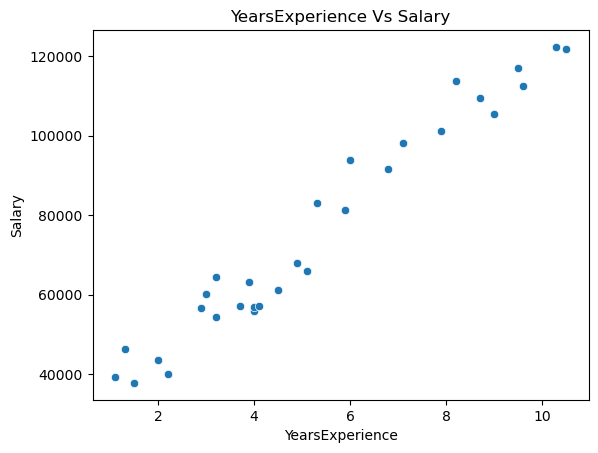

In [114]:
# Linearity 
sns.scatterplot(x = 'YearsExperience', y = 'Salary', data = Salary_Data)
plt.title( 'YearsExperience Vs Salary')
plt.show()

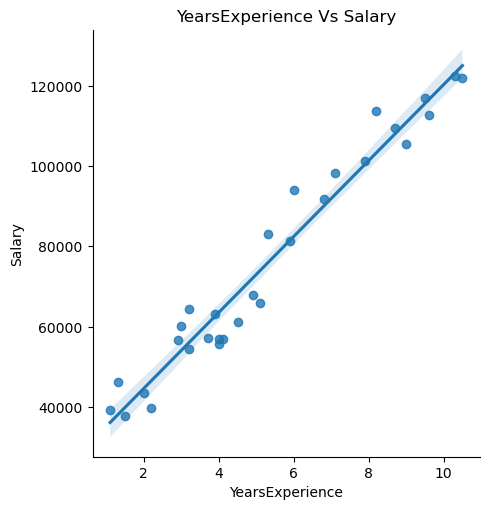

In [115]:
sns.lmplot(x = 'YearsExperience', y = 'Salary', data = Salary_Data)
plt.title( 'YearsExperience Vs Salary')
plt.show()

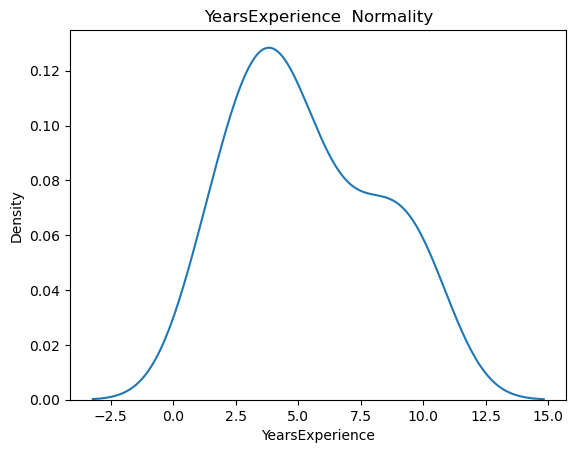

In [116]:
#Normality Test
sns.distplot(a = Salary_Data['YearsExperience'],hist=False)
plt.title('YearsExperience  Normality')
plt.show()

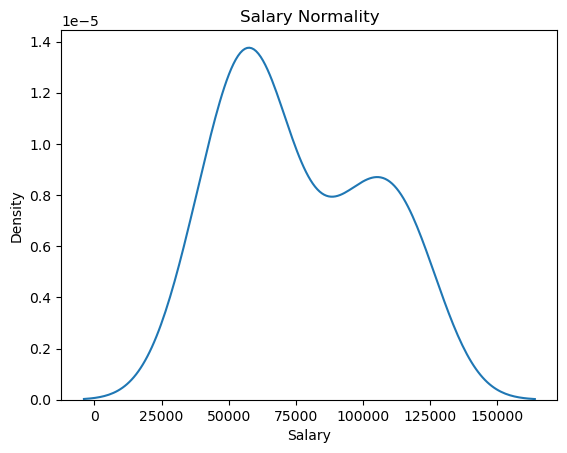

In [117]:
sns.distplot(a = Salary_Data['Salary'],hist=False)
plt.title('Salary Normality')
plt.show()

In [118]:
skew_salary_data=Salary_Data['YearsExperience'].skew()
print('Skewness of YearsExperience ',skew_salary_data)

Skewness of YearsExperience  0.37956024064804106


In [119]:
skew_salary_data=Salary_Data['Salary'].skew()
print('Skewness of Salary',skew_salary_data)

Skewness of Salary 0.35411967922959153


# Fitting a Linear Regression Model

In [120]:
import statsmodels.formula.api as smf
model1_2=smf.ols("Salary~YearsExperience",data=Salary_Data).fit()
model1_2

In [121]:
model1_2.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        00:04:58   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

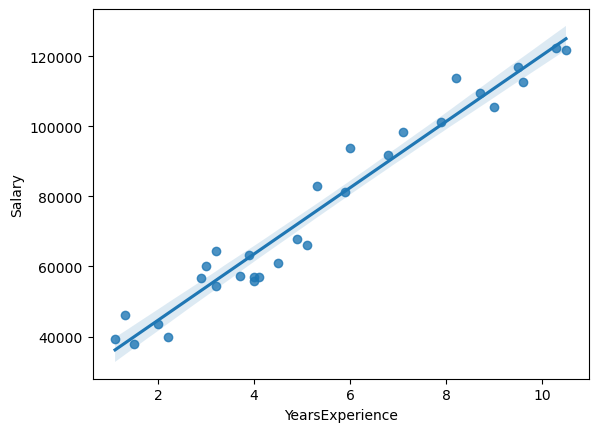

In [122]:
sns.regplot(x="YearsExperience", y="Salary", data=Salary_Data);

In [125]:
#Coefficients
model1_2.params 

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [126]:
model1_2.resid  

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [128]:
pred1_2 = model1_2.predict(Salary_Data.YearsExperience)
pred1_2 

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [129]:
 model1_2.resid_pearson 

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [132]:
rmse_lin_2 = np.sqrt(np.mean((np.array(Salary_Data['Salary'])-np.array(pred1_2))**2))
rmse_lin_2

5592.043608760662

Text(0, 0.5, 'Salary')

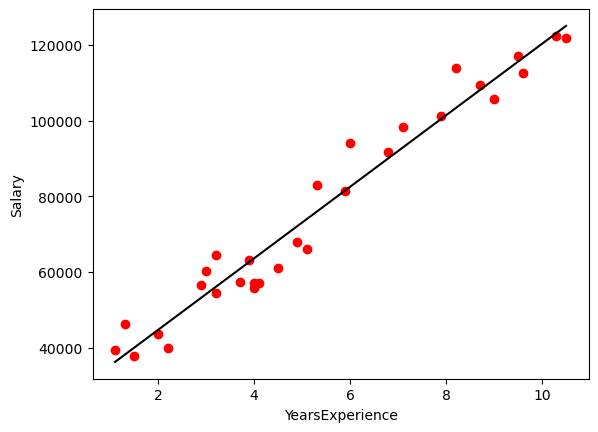

In [133]:
#import matplotlib.pylab as plt
plt.scatter(x=Salary_Data['YearsExperience'],y=Salary_Data['Salary'],color='red')
plt.plot(Salary_Data['YearsExperience'],pred1_2,color='black')
plt.xlabel('YearsExperience')
plt.ylabel('Salary') 

In [134]:
#t and p-Values
print(model1_2.tvalues, '\n', model1_2.pvalues)  

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [135]:
#R squared values
(model1_2.rsquared,model1_2.rsquared_adj) 

(0.9569566641435086, 0.9554194021486339)

In [136]:
print(f"t value is\n{model1_2.tvalues}\nP value is\n{model1_2.pvalues}\n")
print(f"rsquared= {model1_2.rsquared},\nAdj.rsquared= {model1_2.rsquared_adj}")

t value is
Intercept          11.346940
YearsExperience    24.950094
dtype: float64
P value is
Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

rsquared= 0.9569566641435086,
Adj.rsquared= 0.9554194021486339


In [137]:
model2_2 = smf.ols('Salary~np.log(YearsExperience)',data=Salary_Data).fit()

In [138]:
model2_2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           3.25e-13
Time:                        00:07:19   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
pred2_2 = model2_2.predict(pd.DataFrame(Salary_Data['YearsExperience'])) 
pred2_2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [140]:
pred2_2
rmse_log_2 = np.sqrt(np.mean((np.array(Salary_Data['Salary'])-np.array(pred2_2))**2))
rmse_log_2  

10302.893706228306

In [141]:
pred2_2.corr(Salary_Data.Salary)

0.9240610817882641

Text(0, 0.5, 'Salary')

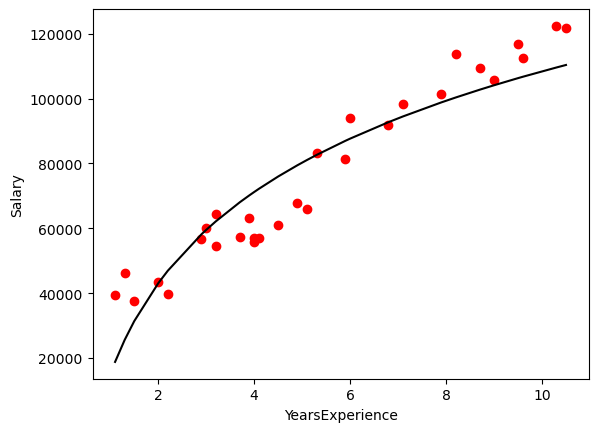

In [142]:
plt.scatter(x=Salary_Data['YearsExperience'],y=Salary_Data['Salary'],color='red')
plt.plot(Salary_Data['YearsExperience'],pred2_2,color='black')
plt.xlabel('YearsExperience')
plt.ylabel('Salary') 

In [143]:
model3_2 = smf.ols('np.log(Salary)~YearsExperience',data=Salary_Data).fit()

In [144]:
model3_2.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [145]:
model3_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           7.03e-18
Time:                        00:07:27   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
pred_log_2 = model3_2.predict(pd.DataFrame(Salary_Data['YearsExperience']))

In [147]:
pred_log_2

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [148]:
pred3_2=np.exp(pred_log_2)  
pred3_2

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [149]:
rmse_exp_2 = np.sqrt(np.mean((np.array(Salary_Data['Salary'])-np.array(pred3_2))**2))
rmse_exp_2 

7213.235076620096

In [150]:
pred3_2.corr(Salary_Data.Salary)

0.9660469705377088

Text(0, 0.5, 'Salary')

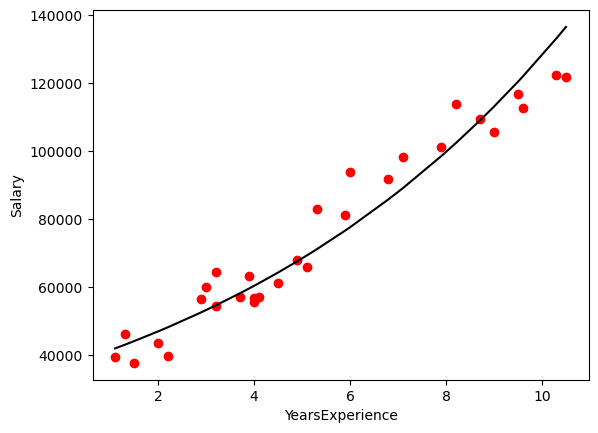

In [151]:
plt.scatter(x=Salary_Data['YearsExperience'],y=Salary_Data['Salary'],color='red')
plt.plot(Salary_Data['YearsExperience'],pred3_2,color='black')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [152]:
Salary_resid = model3_2.resid_pearson 
Salary_resid

array([-0.66732261,  0.71866312, -1.60729238, -0.78878267, -1.9356925 ,
        0.74867647,  1.23436001, -0.0398886 ,  1.68260228, -0.17836411,
        0.58917114, -0.81508595, -0.60434465, -0.71028167, -0.52600626,
        0.04320755, -0.50424366,  1.58695853,  0.60373565,  1.94386552,
        0.6763497 ,  0.99482518,  0.27970841,  1.0847233 ,  0.04297985,
       -0.70724335, -0.30175692, -0.81559685, -0.86410542, -1.1638191 ])

In [153]:
Salary_Data["Salary_Sq"] = Salary_Data.YearsExperience*Salary_Data.YearsExperience
Salary_Data

,YearsExperience,Salary,Salary_Sq
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [154]:
model4_2 = smf.ols('np.log(Salary)~YearsExperience+Salary_Sq',data=Salary_Data).fit()

In [155]:
model4_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           3.95e-18
Time:                        00:07:34   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience     0.2024      0.027      7.601      0.000       0.148       0.257
Salary_Sq          -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
pred_quad_2 = model4_2.predict(Salary_Data)



In [158]:
pred4_2=np.exp(pred_quad_2)

In [159]:
pred4_2

0      38233.559684
1      39686.674746
2      41173.227466
3      45033.440973
4      46633.832589
5      52477.426306
6      53341.747319
7      55091.465477
8      55091.465477
9      59582.917523
10     61423.509899
11     62352.647026
12     62352.647026
13     63287.467325
14     67080.231957
15     70949.981000
16     72909.896294
17     74884.321575
18     80877.084894
19     81883.588147
20     89970.445587
21     93001.652359
22    101003.996109
23    103952.199275
24    108770.218622
25    111590.303652
26    116146.198447
27    117033.009807
28    122976.902760
29    124581.554019
dtype: float64

In [160]:
rmse_quad_2 = np.sqrt(np.mean((np.array(Salary_Data['Salary'])-np.array(pred4_2))**2))
rmse_quad_2

5391.08158269361

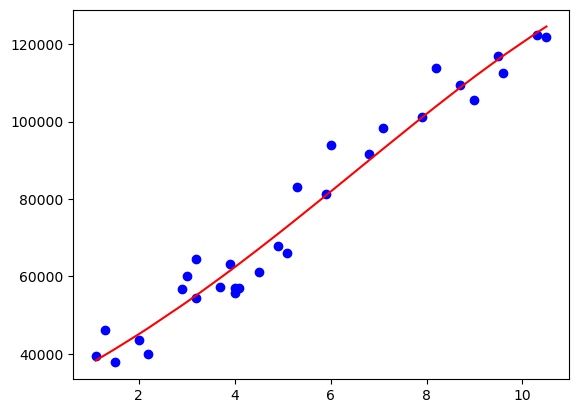

In [161]:
plt.scatter(Salary_Data.YearsExperience,Salary_Data.Salary,c="b")
plt.plot(Salary_Data.YearsExperience,pred4_2,"r") 

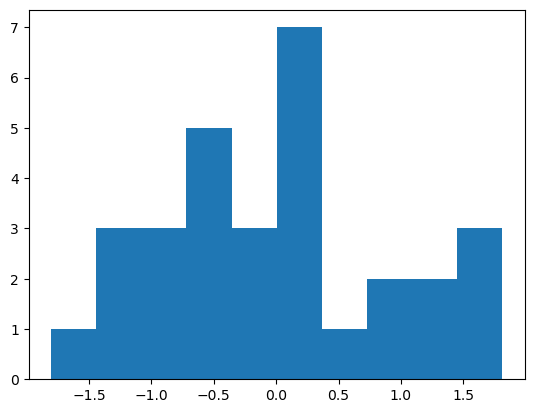

In [164]:
plt.hist(model4_2.resid_pearson)
plt.show() 

In [165]:
data_2= {"MODEL":pd.Series(["rmse_lin_2","rmse_log_2","rmse_exp_2","rmse_quad_2"]),
        "RMSE_Values":pd.Series([rmse_lin_2,rmse_log_2,rmse_exp_2,rmse_quad_2]),
        "Rsquare":pd.Series([model1_2.rsquared,model2_2.rsquared,model3_2.rsquared,model4_2.rsquared])}
table_2=pd.DataFrame(data_2)
table_2 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin_2,5592.043609,0.956957
1,rmse_log_2,10302.893706,0.853889
2,rmse_exp_2,7213.235077,0.931967
3,rmse_quad_2,5391.081583,0.948611


# Prediction for new data point

In [166]:
data1=pd.Series([2.3,3.5])
data1

0    2.3
1    3.5
dtype: float64

In [167]:
data_pred1=pd.DataFrame(data1,columns=['YearsExperience'])
data_pred1

,YearsExperience
0,2.3
1,3.5


In [172]:
model1_2.predict(data_pred1)

0    47527.113538
1    58867.068324
dtype: float64